In [ ]:
!unzip Images.zip

In [ ]:
import cv2
import numpy as np
import os
import random
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
def Average_color(Image):
    B,G,R =cv2.split(Image)
    return [np.average(B),np.average(G),np.average(R)]

In [ ]:
Image_names=os.listdir("Images")

In [ ]:
random.shuffle(Image_names)

In [ ]:
data=[]
target=[]
for image_name in Image_names:
  data.append(Average_color(cv2.imread("Images/{}".format(image_name))))
  target.append(image_name[0])

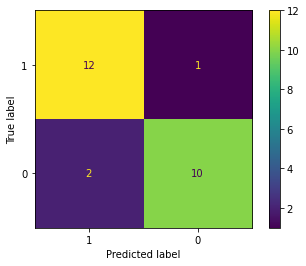

Naive Bayes classification accuracy 0.88
Precision score: 0.9090909090909091
Recall score: 0.8333333333333334


In [ ]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2,random_state=12)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred=gnb.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 0])

cm_display.plot()
plt.show()
print("Naive Bayes classification accuracy", accuracy(y_test, y_pred))
Simple_y_test=[]
simple_y_pred=[]
for i in range(len(y_test)):
  if (y_test[i] == 'c') :
    Simple_y_test.append(0)
  else:
    Simple_y_test.append(1)
  if (y_pred[i] == 'c'):
    simple_y_pred.append(0)
  else:
    simple_y_pred.append(1)  

print("Precision score:", precision_score(Simple_y_test, simple_y_pred))
print("Recall score:", recall_score(Simple_y_test, simple_y_pred))

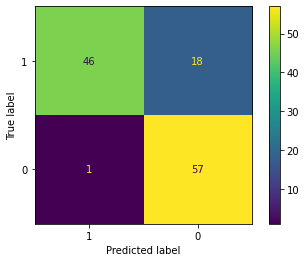

Color classification accuracy: 0.8442622950819673
Precision score: 0.76
Recall score: 0.9827586206896551


In [ ]:

def Color_classifier(colors):
  if(colors[0]>=colors[2]):
    return 'c'
  else:
    return 'm'
def accuracy_color(y_true, y_pred):
    j=0
    for i in range(len(y_true)):
      if(y_true[i] == y_pred[i]):
        j=j+1
    accuracy = j / len(y_true)
    return accuracy
y_pred=[]
for color in data:
  y_pred.append(Color_classifier(color))
confusion_matrix = metrics.confusion_matrix(target, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, 0])

cm_display.plot()
plt.show()
Simple_y_test=[]
simple_y_pred=[]
for i in range(len(target)):
  if (target[i] == 'c') :
    Simple_y_test.append(0)
  else:
    Simple_y_test.append(1)
  if (y_pred[i] == 'c'):
    simple_y_pred.append(0)
  else:
    simple_y_pred.append(1)  


print("Color classification accuracy:", accuracy_color(target.copy(),y_pred))
print("Precision score:", precision_score(Simple_y_test, simple_y_pred))
print("Recall score:", recall_score(Simple_y_test, simple_y_pred))